# Data Mining: Star Classification Project

### Imports

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

### Load the Dataset

In [2]:
df = pd.read_csv('star_classification.csv')

### Exploring the Data

In [3]:
print(df.head(10))
print(df.info())
print(df.describe())

         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
5  1.237680e+18  340.995121  20.589476  23.48827  23.33776  21.32195   
6  1.237679e+18   23.234926  11.418188  21.46973  21.17624  20.92829   
7  1.237679e+18    5.433176  12.065186  22.24979  22.02172  20.34126   
8  1.237661e+18  200.290475  47.199402  24.40286  22.35669  20.61032   
9  1.237671e+18   39.149691  28.102842  21.74669  20.03493  19.17553   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       

In [4]:
print(df.columns)


Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')


In [5]:
numerical_data = df.select_dtypes(include='number')

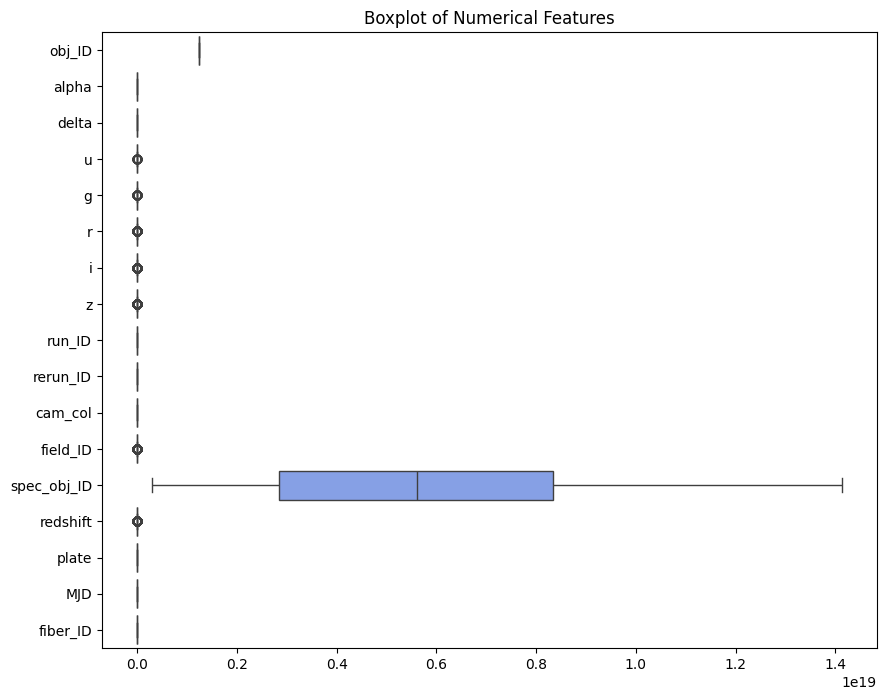

In [6]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=numerical_data, orient="h")
plt.title("Boxplot of Numerical Features")
plt.show()

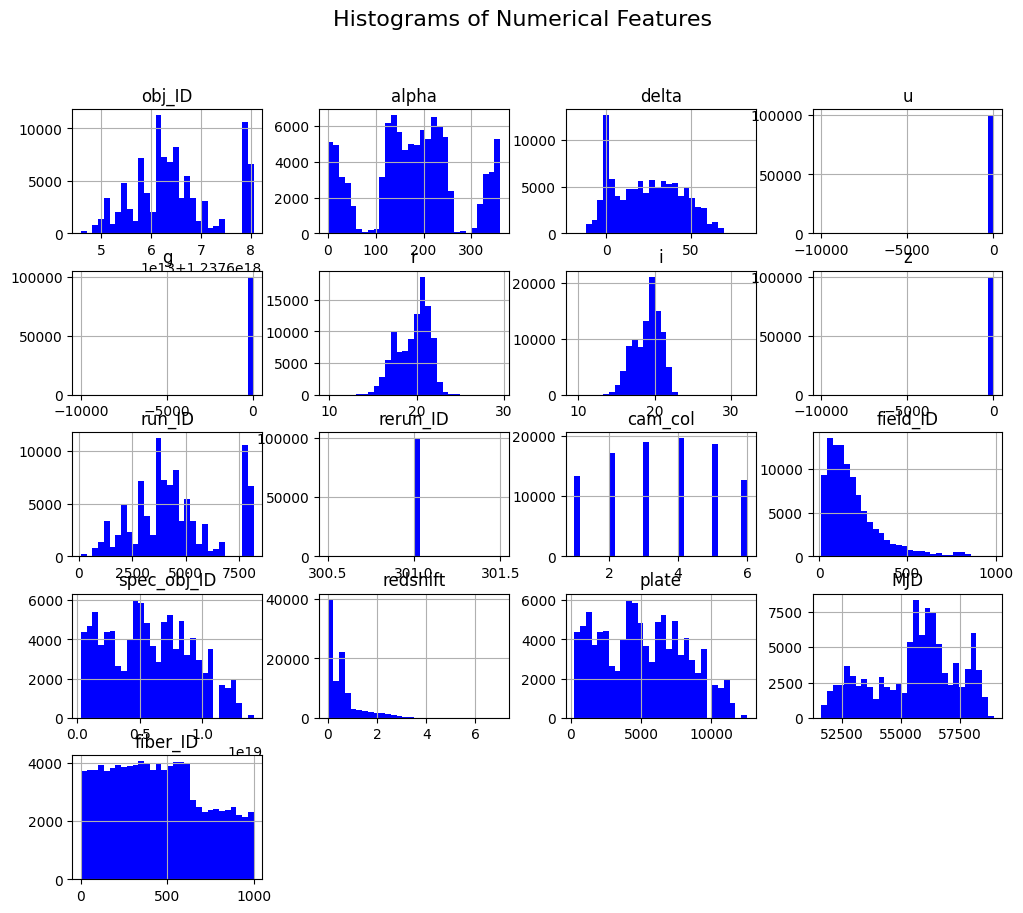

In [7]:
numerical_data.hist(figsize=(12, 10), bins=30, color='blue')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

In [8]:
skewed = numerical_data.skew()
print("Skewness of Numerical Features:\n", skewed)

Skewness of Numerical Features:
 obj_ID           0.398727
alpha           -0.028511
delta            0.175079
u             -313.849242
g             -314.276695
r               -0.507858
i               -0.404167
z             -314.759419
run_ID           0.398711
rerun_ID         0.000000
cam_col         -0.030532
field_ID         1.753425
spec_obj_ID      0.198463
redshift         2.523606
plate            0.198472
MJD             -0.381853
fiber_ID         0.229719
dtype: float64


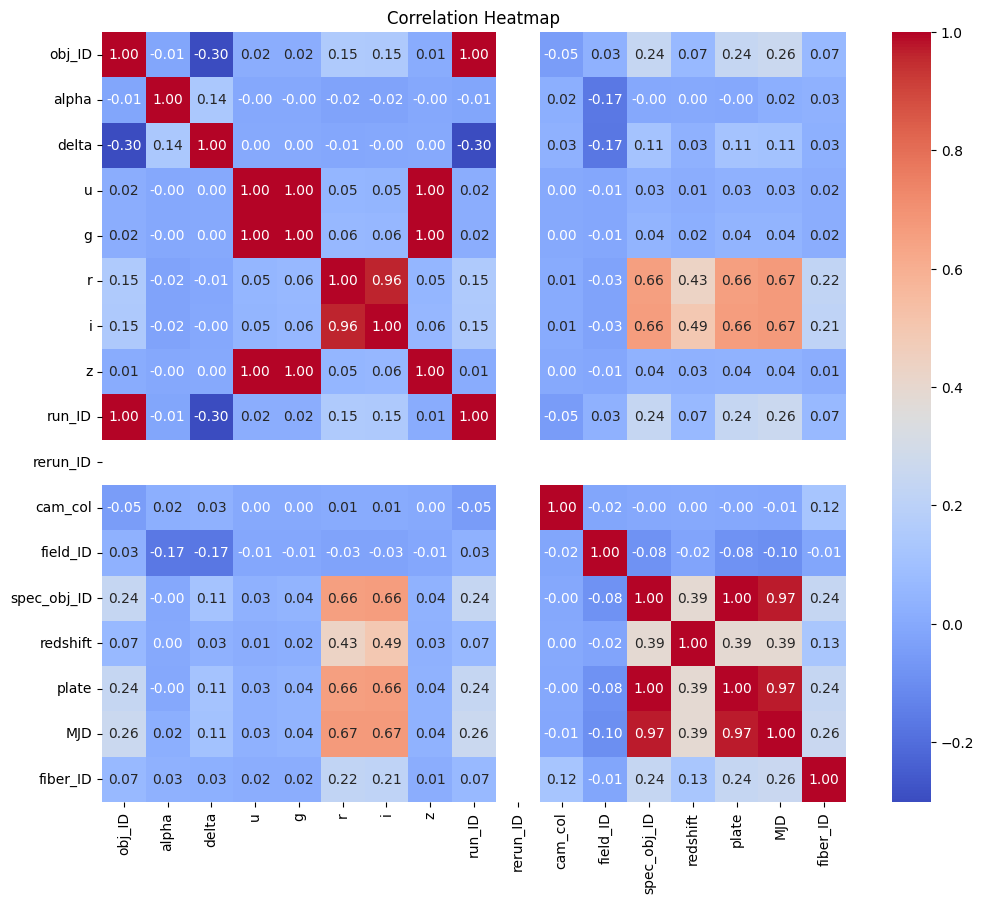

In [9]:
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
df.drop(columns=['obj_ID', 'spec_obj_ID'], inplace=True)


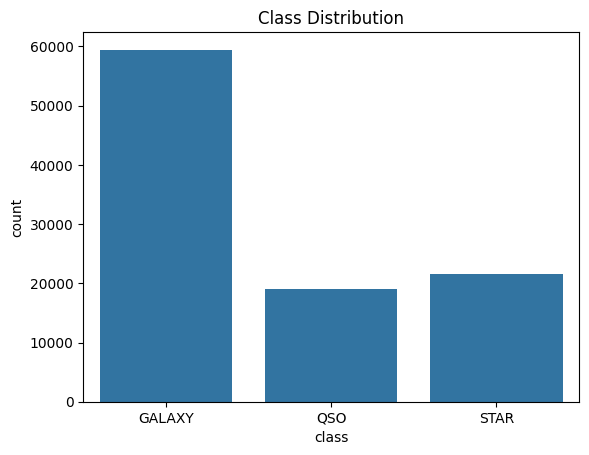

In [11]:
sns.countplot(x='class', data=df)
plt.title("Class Distribution")
plt.show()


#### Splitting the dataset: Train-test split

In [12]:
X = df.drop(columns=['class'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.to_csv("X_train.csv", index=False)
X_test.to_csv("X_test.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Datasets saved")

Datasets saved


In [13]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98     11860
         QSO       0.96      0.93      0.95      3797
        STAR       0.99      1.00      0.99      4343

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



In [14]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

print("Datasets loaded")

Datasets loaded


### Data Pre-processing

In [15]:
df[['u', 'g', 'z']] = df[['u', 'g', 'z']].replace(-9999, np.nan)
print(df.isnull().sum())


alpha       0
delta       0
u           1
g           1
r           0
i           0
z           1
run_ID      0
rerun_ID    0
cam_col     0
field_ID    0
class       0
redshift    0
plate       0
MJD         0
fiber_ID    0
dtype: int64


In [16]:
df = df.drop_duplicates()

In [17]:
Q1 = df[['u', 'g', 'z']].quantile(0.25)
Q3 = df[['u', 'g', 'z']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['u', 'g', 'z']] < (Q1 - 1.5 * IQR)) | (df[['u', 'g', 'z']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [18]:
scaler = MinMaxScaler()
df[['u', 'g', 'z']] = scaler.fit_transform(df[['u', 'g', 'z']])

In [19]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

### Model

In [23]:
X = df.drop(columns=['class'])  
y = df['class']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11842
           1       0.97      0.93      0.95      3760
           2       0.99      1.00      0.99      4327

    accuracy                           0.98     19929
   macro avg       0.98      0.97      0.98     19929
weighted avg       0.98      0.98      0.98     19929



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=['class'])  
y = df['class']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)  # Preserve 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {X_train_pca.shape[1]}")

nb = GaussianNB()
nb.fit(X_train_pca, y_train)

y_pred = nb.predict(X_test_pca)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  29.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  43.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  47.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  31.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  15.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  15.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  49.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  24.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 1.3min
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total tim

#### Evaluate Models

In [33]:
X = df.drop(columns=['class']) 
y = df['class'] 

imputer = SimpleImputer(strategy='mean')  
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_features = X_train.shape[1]  
n_components = min(n_features, 15)  
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features: {X_train_pca.shape[1]}")


nb = GaussianNB()
nb.fit(X_train_pca, y_train)

y_pred_nb = nb.predict(X_test_pca)
print("Naive Bayes Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

rf = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search_rf = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid_rf,
    n_iter=10,  
    cv=3,  
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=2, 
    random_state=42
)

random_search_rf.fit(X_train_pca, y_train)

print("Best Parameters for Random Forest:", random_search_rf.best_params_)
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_pca)

print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Original number of features: 15
Reduced number of features: 15
Naive Bayes Model:
Accuracy: 0.7978824828139897
              precision    recall  f1-score   support

           0       0.78      0.93      0.85     11842
           1       0.95      0.82      0.88      3760
           2       0.70      0.41      0.52      4327

    accuracy                           0.80     19929
   macro avg       0.81      0.72      0.75     19929
weighted avg       0.79      0.80      0.78     19929

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
Random Forest Model:
Accuracy: 0.9334637964774951
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11842
           1       0.97      0.90      0.93      3760
           2       0.92      0.87      0.90      4327

    accuracy                           0.93     19929
   m

#### Visualize Findings

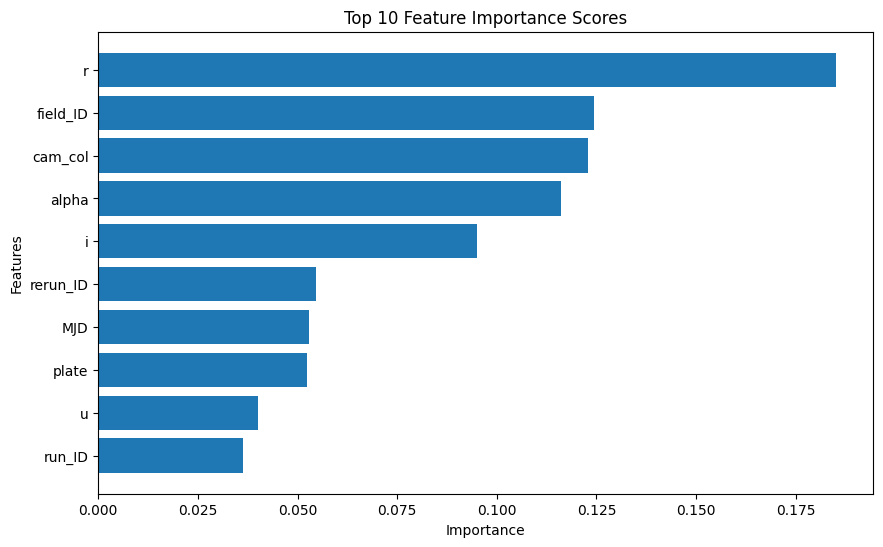

In [34]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10])
plt.gca().invert_yaxis()  # Highest importance at the top
plt.title('Top 10 Feature Importance Scores')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()